In [54]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

main_experiments_path = "../experiments"


basic_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp_0.01",
    "mlp_0.001",
    "mlp_0.0001",
    "rbf_full_0.01",
    "rbf_full_0.001",
    "rbf_full_0.0001",
    "rbf_diag_0.01",
    "rbf_diag_0.001",
    "rbf_diag_0.0001",
    "rbf_scal_0.01",
    "rbf_scal_0.001",
    "rbf_scal_0.0001",
    "rbf_univ_0.01",
    "rbf_univ_0.001",
    "rbf_univ_0.0001",
    "ffn_0.1_0.01",
    "ffn_0.1_0.001",
    "ffn_0.1_0.0001",
    "ffn_1_0.01",
    "ffn_1_0.001",
    "ffn_1_0.0001",
    "ffn_10_0.01",
    "ffn_10_0.001",
    "ffn_10_0.0001",
    "uffn_0.1_0.01",
    "uffn_0.1_0.001",
    "uffn_0.1_0.0001",
    "uffn_1_0.01",
    "uffn_1_0.001",
    "uffn_1_0.0001",
    "uffn_10_0.01",
    "uffn_10_0.001",
    "uffn_10_0.0001",
]


basic_condensed_method_names = [
    "svr",
    "pls",
    "gradboost",
    "mlp",
    "rbf_full",
    "rbf_diag",
    "rbf_scal",
    "rbf_univ",
    "ffn",
    "uffn",
]

method_names = []
condensed_method_names = []

_method_names = []
_condensed_method_names = []

data_dims = list(range(1,4))

for i in data_dims:
    _method_names += [str(i)+"_"+method for method in basic_method_names]
    _condensed_method_names += [str(i)+"_"+method for method in basic_condensed_method_names]


frequencies = [2**i for i in list(range(0,4))]

for i in frequencies:
    method_names += ["freq_"+str(i)+"_"+method for method in _method_names]
    condensed_method_names += ["freq_"+str(i)+"_"+method for method in _condensed_method_names]

repetition_ids = list(range(8))
learning_rates = ["0.01", "0.001", "0.0001"]
scales = ["0.1", "1", "10"]


experiments_data = xr.DataArray(np.zeros((len(frequencies),len(data_dims),len(basic_condensed_method_names), len(repetition_ids), len(learning_rates), len(scales))) - 1, coords=[frequencies,data_dims, basic_condensed_method_names, repetition_ids, learning_rates,scales], dims=['frequencies','data_dims','method', 'repetition','lr','scales'])

method_settings = os.listdir(main_experiments_path)

# sort by name
method_settings = sorted(method_settings)

#print all folders in the main experiments path
for method_folder in method_settings:
    # iterate over repetitions

    if method_folder.startswith("."):
        continue

    for repetition_folder in os.listdir(main_experiments_path + "/" + method_folder):
        # iterate over files

        if repetition_folder.startswith("."):
            continue

        ## add this repetition to the experiment df as column
        try:
            ## read the npy file
            train_loss = np.load(main_experiments_path + "/" + method_folder + "/" + repetition_folder + "/data/" + "train_loss.npy")
            val_loss = np.load(main_experiments_path + "/" + method_folder + "/" + repetition_folder +  "/data/"  + "val_loss.npy")
            test_loss = np.load(main_experiments_path + "/" + method_folder + "/" + repetition_folder + "/data/" + "test_loss.npy")
        except Exception as e:
            print("Error reading files for dataset: ", method_folder, e)
            continue
        
        ### extract the min val loss and pick the corresponding test loss

        min_val_loss = np.min(val_loss)
        min_val_loss_index = np.argmin(val_loss)

        min_test_loss = test_loss[min_val_loss_index]

        method_folder_id = int(method_folder.split("_")[1])

        method_description = method_names[method_folder_id - 1]
        method_parts = method_description.split("_")

        #print(method_parts)

        data_dim = int(method_parts[2])
        data_freq = int(method_parts[1])

        method_name = method_parts[3]

        repetition_id = int(repetition_folder.split("_")[1])
        
        scale = None
        lr = None

        if method_name == "rbf":
            method_name = method_name + "_" + method_parts[-2]
            lr = method_parts[-1]
        elif method_name == "ffn" or method_name == "uffn":
            scale = method_parts[-2]
            lr = method_parts[-1]
        elif method_name == "mlp":
            lr = method_parts[-1]

        if lr is None:
            experiments_data.loc[data_freq,data_dim, method_name, repetition_id, :,:] = min_test_loss
        elif lr is not None  and scale is None:
            experiments_data.loc[data_freq,data_dim, method_name, repetition_id, lr,:] = min_test_loss
        else:
            experiments_data.loc[data_freq,data_dim, method_name, repetition_id, lr, scale] = min_test_loss



## replace all -1 with nan

#test = experiments_data.where(experiments_data == -1)
#print(test)

experiments_data = experiments_data.where(experiments_data != -1)

print(experiments_data.loc[1,1,"svr",:,:])


experiments_data



<xarray.DataArray (repetition: 8, lr: 3, scales: 3)> Size: 576B
array([[[ 357.00837728,  357.00837728,  357.00837728],
        [ 357.00837728,  357.00837728,  357.00837728],
        [ 357.00837728,  357.00837728,  357.00837728]],

       [[3004.57263919, 3004.57263919, 3004.57263919],
        [3004.57263919, 3004.57263919, 3004.57263919],
        [3004.57263919, 3004.57263919, 3004.57263919]],

       [[5515.3585216 , 5515.3585216 , 5515.3585216 ],
        [5515.3585216 , 5515.3585216 , 5515.3585216 ],
        [5515.3585216 , 5515.3585216 , 5515.3585216 ]],

       [[ 260.23323322,  260.23323322,  260.23323322],
        [ 260.23323322,  260.23323322,  260.23323322],
        [ 260.23323322,  260.23323322,  260.23323322]],

       [[1345.55683977, 1345.55683977, 1345.55683977],
        [1345.55683977, 1345.55683977, 1345.55683977],
        [1345.55683977, 1345.55683977, 1345.55683977]],

       [[1951.52786719, 1951.52786719, 1951.52786719],
        [1951.52786719, 1951.52786719, 1951.52

<xarray.DataArray (frequencies: 4, data_dims: 3, method: 10, repetition: 8,
                   lr: 3, scales: 3)> Size: 69kB
array([[[[[[3.57008377e+02, 3.57008377e+02, 3.57008377e+02],
           [3.57008377e+02, 3.57008377e+02, 3.57008377e+02],
           [3.57008377e+02, 3.57008377e+02, 3.57008377e+02]],

          [[3.00457264e+03, 3.00457264e+03, 3.00457264e+03],
           [3.00457264e+03, 3.00457264e+03, 3.00457264e+03],
           [3.00457264e+03, 3.00457264e+03, 3.00457264e+03]],

          [[5.51535852e+03, 5.51535852e+03, 5.51535852e+03],
           [5.51535852e+03, 5.51535852e+03, 5.51535852e+03],
           [5.51535852e+03, 5.51535852e+03, 5.51535852e+03]],

          ...,

          [[1.95152787e+03, 1.95152787e+03, 1.95152787e+03],
           [1.95152787e+03, 1.95152787e+03, 1.95152787e+03],
           [1.95152787e+03, 1.95152787e+03, 1.95152787e+03]],

          [[2.41752624e+03, 2.41752624e+03, 2.41752624e+03],
           [2.41752624e+03, 2.41752624e+03, 2.41752624e+03],
...
           [3.66887017e+04, 3.38132549e+04, 3.57980303e+04],
           [3.75075632e+04, 3.54716497e+04, 3.59465508e+04]],

          [[3.55857222e+04, 3.33273867e+04, 3.50380034e+04],
           [3.53796323e+04, 3.10391813e+04, 3.49603423e+04],
           [3.55841097e+04, 3.29688682e+04, 3.44357283e+04]],

          ...,

          [[3.30382827e+04, 3.09932665e+04, 3.24885682e+04],
           [3.24542677e+04, 3.07546023e+04, 3.30132262e+04],
           [3.28146072e+04, 3.13498629e+04, 3.31194764e+04]],

          [[3.28453833e+04, 3.25930039e+04, 3.37801384e+04],
           [3.27974271e+04, 3.15228362e+04, 3.32315464e+04],
           [3.28042542e+04, 3.12880010e+04, 3.29061080e+04]],

          [[3.31408505e+04, 3.21600413e+04, 3.25936669e+04],
           [3.33071772e+04, 2.85033527e+04, 3.26352595e+04],
           [3.31519052e+04, 3.14141895e+04, 3.26797000e+04]]]]]])
Coordinates:
  * frequencies  (frequencies) int64 32B 1 2 4 8
  * data_dims    (data_dims) int64 24B 1 2 3
  * method       (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * repetition   (repetition) int64 64B 0 1 2 3 4 5 6 7
  * lr           (lr) <U6 72B '0.01' '0.001' '0.0001'
  * scales       (scales) <U3 36B '0.1' '1' '10'

In [55]:
_experiments_data = experiments_data.copy()


repetition_dims_frequencies_mean_data = _experiments_data.mean(dim=['data_dims', 'frequencies', 'repetition'])


min_mlp_mean = repetition_dims_frequencies_mean_data.sel(dict(method="mlp")).min()
repetition_dims_frequencies_mean_data = repetition_dims_frequencies_mean_data / min_mlp_mean
_experiments_data = _experiments_data / min_mlp_mean


repetition_dims_frequencies_std_data = _experiments_data.std(dim=['data_dims', 'frequencies', 'repetition'])
repetition_dims_frequencies_summary_data = xr.concat([repetition_dims_frequencies_mean_data, repetition_dims_frequencies_std_data], dim= pd.Index(["mean", "std"], name='summary'))

means = repetition_dims_frequencies_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim="lr")
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_dims_frequencies_summary_data = repetition_dims_frequencies_summary_data.isel(lr=min_mean_index, missing_dims="ignore")
collapsed_repetition_dims_frequencies_summary_data = collapsed_repetition_dims_frequencies_summary_data.drop_vars('lr')



means = collapsed_repetition_dims_frequencies_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='scales')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_dims_frequencies_summary_data = collapsed_repetition_dims_frequencies_summary_data.isel(scales=min_mean_index, missing_dims="ignore")
collapsed_repetition_dims_frequencies_summary_data = collapsed_repetition_dims_frequencies_summary_data.drop_vars(['scales'])




collapsed_repetition_dims_frequencies_summary_data

<xarray.DataArray (summary: 2, method: 10)> Size: 160B
array([[0.5961767 , 0.6145099 , 0.55452741, 1.        , 0.97077955,
        0.96713956, 0.98048006, 0.84808514, 0.86782346, 0.90738802],
       [1.02215197, 1.11038423, 1.2818639 , 1.99923206, 1.99909704,
        1.98895705, 2.01897329, 1.78373575, 1.80471797, 1.90652134]])
Coordinates:
  * method   (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * summary  (summary) object 16B 'mean' 'std'

In [56]:
_experiments_data = experiments_data.copy()


repetition_frequencies_mean_data = _experiments_data.mean(dim=['frequencies', 'repetition'])


min_mlp_mean = repetition_frequencies_mean_data.sel(dict(method="mlp")).min()
repetition_frequencies_mean_data = repetition_frequencies_mean_data / min_mlp_mean
_experiments_data = _experiments_data / min_mlp_mean


repetition_frequencies_std_data = _experiments_data.std(dim=['frequencies', 'repetition'])

repetition_frequencies_summary_data = xr.concat([repetition_frequencies_mean_data, repetition_frequencies_std_data], dim= pd.Index(["mean", "std"], name='summary'))

means = repetition_frequencies_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim="lr")
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_frequencies_summary_data = repetition_frequencies_summary_data.isel(lr=min_mean_index, missing_dims="ignore")
collapsed_repetition_frequencies_summary_data = collapsed_repetition_frequencies_summary_data.drop_vars('lr')



means = collapsed_repetition_frequencies_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='scales')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_frequencies_summary_data = collapsed_repetition_frequencies_summary_data.isel(scales=min_mean_index, missing_dims="ignore")
collapsed_repetition_frequencies_summary_data = collapsed_repetition_frequencies_summary_data.drop_vars(['scales'])




collapsed_repetition_frequencies_summary_data

<xarray.DataArray (summary: 2, data_dims: 3, method: 10)> Size: 480B
array([[[ 4.68518716,  4.81590424,  4.43341441,  3.35486469,
          3.28346134,  3.28346134,  3.28050792,  2.67649367,
          2.94372397,  2.94372397],
        [ 1.13757793,  1.19083783,  0.97000296,  1.        ,
          0.91339244,  0.91339244,  0.93367707,  0.88222431,
          0.89044189,  0.88526009],
        [ 0.5419338 ,  0.55367942,  0.5166395 ,  6.3209951 ,
          6.16705256,  6.12819257,  6.24911746,  5.49532007,
          5.43059577,  5.85816323]],

       [[ 5.19962464,  5.80071062,  7.10492054,  5.17532711,
          4.97306087,  4.97306087,  4.974676  ,  4.31242099,
          4.95922306,  4.95922306],
        [ 1.39818815,  1.40075138,  1.46300107,  1.60860112,
          1.5716096 ,  1.5716096 ,  1.55060792,  1.56104078,
          1.53860752,  1.48684416],
        [ 0.8163857 ,  0.81238273,  0.79088937, 10.4047227 ,
         10.5253222 , 10.46211664, 10.64973595,  9.43548659,
          9.29725655,  9.93982782]]])
Coordinates:
  * data_dims  (data_dims) int64 24B 1 2 3
  * method     (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * summary    (summary) object 16B 'mean' 'std'

In [57]:
_experiments_data = experiments_data.copy()


repetition_dim_mean_data = _experiments_data.mean(dim=['data_dims', 'repetition'])


min_mlp_mean = repetition_dim_mean_data.sel(dict(method="mlp")).min()
repetition_dim_mean_data = repetition_dim_mean_data / min_mlp_mean
_experiments_data = _experiments_data / min_mlp_mean


repetition_dim_std_data = _experiments_data.std(dim=['data_dims', 'repetition'])

repetition_dim_summary_data = xr.concat([repetition_dim_mean_data, repetition_dim_std_data], dim= pd.Index(["mean", "std"], name='summary'))

means = repetition_dim_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim="lr")
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_dim_summary_data = repetition_dim_summary_data.isel(lr=min_mean_index, missing_dims="ignore")
collapsed_repetition_dim_summary_data = collapsed_repetition_dim_summary_data.drop_vars('lr')



means = collapsed_repetition_dim_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='scales')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_dim_summary_data = collapsed_repetition_dim_summary_data.isel(scales=min_mean_index, missing_dims="ignore")
collapsed_repetition_dim_summary_data = collapsed_repetition_dim_summary_data.drop_vars(['scales'])




collapsed_repetition_dim_summary_data

<xarray.DataArray (summary: 2, frequencies: 4, method: 10)> Size: 640B
array([[[7.80718094e+00, 1.14865984e+01, 1.67419484e+00, 1.00000000e+00,
         2.42814676e+00, 2.42814676e+00, 2.36262113e+00, 2.15542681e+00,
         6.03352743e-01, 6.21546311e-01],
        [1.01189088e+01, 1.15581634e+01, 3.70995262e+00, 2.34260097e+00,
         1.88282398e+00, 1.88290696e+00, 1.88457568e+00, 2.42748322e+00,
         2.13749092e-01, 2.04459706e-01],
        [3.36184169e+01, 2.78508352e+01, 1.89540594e+01, 2.20383232e+01,
         1.53225287e+01, 1.53189467e+01, 1.54485918e+01, 7.75418824e+00,
         1.06735652e+01, 1.18031056e+01],
        [8.97216934e+01, 9.47147186e+01, 1.07059044e+02, 2.11208892e+02,
         2.08678037e+02, 2.08570149e+02, 2.08349204e+02, 1.88619706e+02,
         1.92657469e+02, 2.00861925e+02]],

       [[1.62878233e+01, 3.63138058e+01, 5.32831908e+00, 3.79109665e+00,
         5.46603608e+00, 5.46603608e+00, 5.43622771e+00, 4.97974907e+00,
         1.95061823e+00, 1.94598633e+00],
        [1.39223750e+01, 1.93391193e+01, 5.99493823e+00, 5.18535236e+00,
         3.42853119e+00, 3.42848580e+00, 3.42601530e+00, 5.28428319e+00,
         3.30409215e-01, 3.35262558e-01],
        [4.40064523e+01, 3.55498732e+01, 2.77118751e+01, 2.76558973e+01,
         2.80757598e+01, 2.80754839e+01, 2.80241723e+01, 1.38762978e+01,
         1.79673392e+01, 1.75240013e+01],
        [8.89681796e+01, 9.81767649e+01, 1.21290580e+02, 1.58207368e+02,
         1.57827033e+02, 1.57692360e+02, 1.56669576e+02, 1.37344409e+02,
         1.35957669e+02, 1.46741089e+02]]])
Coordinates:
  * frequencies  (frequencies) int64 32B 1 2 4 8
  * method       (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * summary      (summary) object 16B 'mean' 'std'

In [58]:
_experiments_data = experiments_data.copy()

### average over repetitions and pick the min value across learning rates
repetition_mean_data = _experiments_data.mean(dim='repetition')
min_mlp_mean = repetition_mean_data.sel(dict(method="mlp")).min(dim='lr')

print("min mlp ",min_mlp_mean.shape, "min mlp", min_mlp_mean)
repetition_mean_data = repetition_mean_data / min_mlp_mean

_experiments_data = _experiments_data / min_mlp_mean 
repetition_std_data = _experiments_data.std(dim='repetition')
## combine mean and std into one xarray

repetition_summary_data = xr.concat([repetition_mean_data, repetition_std_data], dim= pd.Index(["mean", "std"], name='summary'))

### now keep the min mean value across learning rates for each method and data dimension combination and also keep the corresponding std value 
means = repetition_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim="lr")

print("min mean index: ",min_mean_index)

min_mean_index = min_mean_index.drop_vars('summary')

min_mean_index = min_mean_index.squeeze()

collapsed_repetition_summary_data = repetition_summary_data.isel(lr=min_mean_index, missing_dims="ignore")
collapsed_repetition_summary_data = collapsed_repetition_summary_data.drop_vars('lr')



means = collapsed_repetition_summary_data.sel(summary="mean")
min_mean_index = means.argmin(dim='scales')
min_mean_index = min_mean_index.drop_vars('summary')
min_mean_index = min_mean_index.squeeze()

collapsed_repetition_summary_data = collapsed_repetition_summary_data.isel(scale=min_mean_index, missing_dims="ignore")
collapsed_repetition_summary_data = collapsed_repetition_summary_data.drop_vars(['scales'])



collapsed_repetition_summary_data

min mlp  (4, 3, 3) min mlp <xarray.DataArray (frequencies: 4, data_dims: 3, scales: 3)> Size: 288B
array([[[2.41984504e+02, 2.41984504e+02, 2.41984504e+02],
        [5.28043847e-01, 5.28043847e-01, 5.28043847e-01],
        [9.15222635e-03, 9.15222635e-03, 9.15222635e-03]],

       [[5.55489964e+02, 5.55489964e+02, 5.55489964e+02],
        [1.04386304e+01, 1.04386304e+01, 1.04386304e+01],
        [2.20297574e+00, 2.20297574e+00, 2.20297574e+00]],

       [[3.65201234e+03, 3.65201234e+03, 3.65201234e+03],
        [3.53342649e+02, 3.53342649e+02, 3.53342649e+02],
        [1.33941662e+03, 1.33941662e+03, 1.33941662e+03]],

       [[1.33668775e+04, 1.33668775e+04, 1.33668775e+04],
        [4.65205563e+03, 4.65205563e+03, 4.65205563e+03],
        [3.26832400e+04, 3.26832400e+04, 3.26832400e+04]]])
Coordinates:
  * frequencies  (frequencies) int64 32B 1 2 4 8
  * data_dims    (data_dims) int64 24B 1 2 3
    method       <U9 36B 'mlp'
  * scales       (scales) <U3 36B '0.1' '1' '10'
min mean i

<xarray.DataArray (summary: 2, frequencies: 4, data_dims: 3, method: 10,
                   scales: 3)> Size: 6kB
array([[[[[7.80236076e+00, 7.80236076e+00, 7.80236076e+00],
          [1.11800809e+01, 1.11800809e+01, 1.11800809e+01],
          [1.67578725e+00, 1.67578725e+00, 1.67578725e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [2.43348728e+00, 2.43348728e+00, 2.43348728e+00],
          [2.43348728e+00, 2.43348728e+00, 2.43348728e+00],
          [2.36777147e+00, 2.36777147e+00, 2.36777147e+00],
          [2.16019513e+00, 2.16019513e+00, 2.16019513e+00],
          [6.00509437e-01, 7.37785891e-01, 7.77691002e+00],
          [6.00509437e-01, 7.37785891e-01, 7.77691002e+00]],

         [[1.01425356e+01, 1.01425356e+01, 1.01425356e+01],
          [1.42923971e+02, 1.42923971e+02, 1.42923971e+02],
          [9.37684096e-01, 9.37684096e-01, 9.37684096e-01],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [2.04511328e-02, 2.04511328e-02, 2.04511328e-02],
          [2.04511328e-02, 2.04511328e-02, 2.04511328e-02],
          [3.10882059e-02, 3.10882059e-02, 3.10882059e-02],
          [7.03756847e-03, 7.03756847e-03, 7.03756847e-03],
          [1.54423990e+00, 7.32758202e-01, 2.18281816e+02],
...
          [9.68602269e-02, 9.68602269e-02, 9.68602269e-02],
          [1.36160677e-01, 1.36160677e-01, 1.36160677e-01],
          [9.98446773e-02, 9.98446773e-02, 9.98446773e-02],
          [9.08087923e-02, 9.08087923e-02, 9.08087923e-02],
          [9.08087923e-02, 9.08087923e-02, 9.08087923e-02],
          [9.09869882e-02, 9.09869882e-02, 9.09869882e-02],
          [1.04013137e-01, 1.04013137e-01, 1.04013137e-01],
          [1.03873869e-01, 1.01638619e-01, 1.12371602e-01],
          [1.06118664e-01, 9.39555667e-02, 8.14405382e-02]],

         [[3.61059896e-03, 3.61059896e-03, 3.61059896e-03],
          [3.59596622e-03, 3.59596622e-03, 3.59596622e-03],
          [3.07183254e-03, 3.07183254e-03, 3.07183254e-03],
          [3.66456400e-02, 3.66456400e-02, 3.66456400e-02],
          [6.05670748e-02, 6.05670748e-02, 6.05670748e-02],
          [6.46251999e-02, 6.46251999e-02, 6.46251999e-02],
          [6.66586160e-02, 6.66586160e-02, 6.66586160e-02],
          [3.50244743e-02, 3.50244743e-02, 3.50244743e-02],
          [4.83152931e-02, 4.47016252e-02, 4.69500268e-02],
          [4.57342562e-02, 5.22795155e-02, 3.61251105e-02]]]]])
Coordinates:
  * frequencies  (frequencies) int64 32B 1 2 4 8
  * data_dims    (data_dims) int64 24B 1 2 3
  * method       (method) <U9 360B 'svr' 'pls' 'gradboost' ... 'ffn' 'uffn'
  * summary      (summary) object 16B 'mean' 'std'
Dimensions without coordinates: scales

### Averaged over Frequencies

method       SVR  GradBoost       MLP  RBF Full  RBF Diag  RBF Scal     U-RBF  \
1       4.685187   4.433414  3.354865  3.283461  3.283461  3.280508  2.676494   
2       1.137578   0.970003  1.000000  0.913392  0.913392  0.933677  0.882224   
3       0.541934   0.516640  6.320995  6.167053  6.128193  6.249117  5.495320   

method       FFM     U-FFM  
1       2.943724  2.943724  
2       0.890442  0.885260  
3       5.430596  5.858163  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


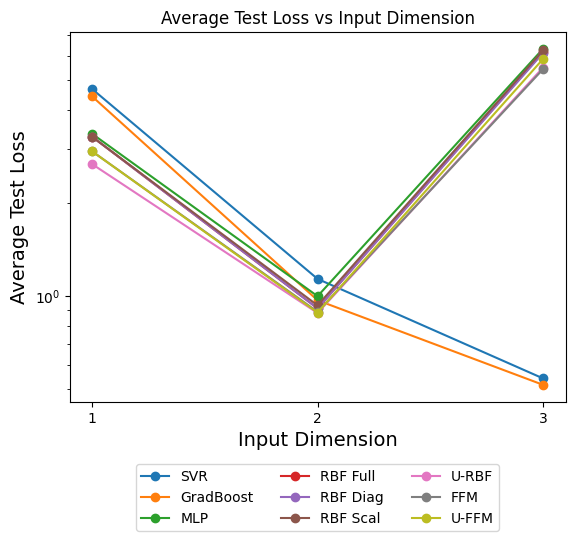

method,SVR,GradBoost,MLP,RBF Full,RBF Diag,RBF Scal,U-RBF,FFM,U-FFM
1 m,4.685187,4.433414,3.354865,3.283461,3.283461,3.280508,2.676494,2.943724,2.943724
1 s,5.199625,7.104921,5.175327,4.973061,4.973061,4.974676,4.312421,4.959223,4.959223
2 m,1.137578,0.970003,1.000000,0.913392,0.913392,0.933677,0.882224,0.890442,0.885260
2 s,1.398188,1.463001,1.608601,1.571610,1.571610,1.550608,1.561041,1.538608,1.486844
3 m,0.541934,0.516640,6.320995,6.167053,6.128193,6.249117,5.495320,5.430596,5.858163
3 s,0.816386,0.790889,10.404723,10.525322,10.462117,10.649736,9.435487,9.297257,9.939828
value m,0.596177,0.554527,1.000000,0.970780,0.967140,0.980480,0.848085,0.867823,0.907388
value s,1.022152,1.281864,1.999232,1.999097,1.988957,2.018973,1.783736,1.804718,1.906521


In [59]:
method_renaming = {
    "svr": "SVR",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF Diag",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}

### rename the method coords and only keep the methods that have a mapping

collapsed_repetition_frequencies_summary_data = collapsed_repetition_frequencies_summary_data.sel(dict(method=[key for key in method_renaming.keys() if key in collapsed_repetition_frequencies_summary_data.method.values]))
collapsed_repetition_frequencies_summary_data.coords['method'] = [method_renaming[method] for method in collapsed_repetition_frequencies_summary_data.method.values]



mean_summary_data = collapsed_repetition_frequencies_summary_data.sel(summary="mean")
std_summary_data = collapsed_repetition_frequencies_summary_data.sel(summary="std") 



mean_df = mean_summary_data.to_dataframe(name='value').reset_index()
mean_df = mean_df.pivot_table(index='data_dims', columns='method', values='value', aggfunc=lambda x: list(x)[0])

std_df = std_summary_data.to_dataframe(name='value').reset_index()
std_df = std_df.pivot_table(index='data_dims', columns='method', values='value', aggfunc=lambda x: list(x)[0])


## rename the row index 
mean_df.index = [str(dim) + " m"  for dim in mean_df.index]
std_df.index = [str(dim) + " s"  for dim in std_df.index]


### merge the mean and std dataframes into one and alternate the rows

final_df = pd.concat([mean_df, std_df], axis=0)
final_df = final_df.sort_index()


collapsed_repetition_dims_frequencies_summary_data = collapsed_repetition_dims_frequencies_summary_data.sel(dict(method=[key for key in method_renaming.keys() if key in collapsed_repetition_dim_summary_data.method.values]))
collapsed_repetition_dims_frequencies_summary_data.coords['method'] = [method_renaming[method] for method in collapsed_repetition_dims_frequencies_summary_data.method.values]


mean_datasets_summary_data = collapsed_repetition_dims_frequencies_summary_data.sel(summary="mean")
std_datasets_summary_data = collapsed_repetition_dims_frequencies_summary_data.sel(summary="std")

mean_datasets_summary_data = mean_datasets_summary_data.to_dataframe(name='value').reset_index()
mean_datasets_summary_data = mean_datasets_summary_data.pivot_table( columns='method', values='value', aggfunc=lambda x: list(x)[0])

std_datasets_summary_data = std_datasets_summary_data.to_dataframe(name='value').reset_index()
std_datasets_summary_data = std_datasets_summary_data.pivot_table( columns='method', values='value', aggfunc=lambda x: list(x)[0])

## rename the row index
mean_datasets_summary_data.index = [str(dim) + " m"  for dim in mean_datasets_summary_data.index]

std_datasets_summary_data.index = [str(dim) + " s"  for dim in std_datasets_summary_data.index]


final_datasets_summary_df = pd.concat([mean_datasets_summary_data, std_datasets_summary_data], axis=0)
final_datasets_summary_df = final_datasets_summary_df.sort_index()

final_df = pd.concat([final_df, final_datasets_summary_df], axis=0)


### sort the columns by the method name

final_df = final_df[method_renaming.values()]


df_means = final_df.loc[final_df.index.str.endswith(" m"), :]
## remove the m from the index

df_means.index = [dim.replace(" m", "") for dim in df_means.index]

## remove the row called value
df_means = df_means.drop(index="value")

### plot each method in a line plot with frequency on the x axis and the mean test loss on the y axis


print(df_means)

fig, ax = plt.subplots(1,1,)

ax.plot(df_means.index, df_means, marker='o', )

ax.set_xlabel("Input Dimension",fontsize=14)

ax.set_ylabel("Average Test Loss",fontsize=14)
ax.set_yscale('log')
ax.set_title("Average Test Loss vs Input Dimension")

ax.legend()
plt.legend(df_means.columns, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


plt.savefig("../../../assets/v2dimension_sweep.pdf", format="pdf", bbox_inches='tight')


plt.show()



final_df


In [60]:
## print the final df to a latex table

formatted_df = final_df.copy()

### format the values to 2 decimal places
formatted_df = formatted_df.map(lambda x: "{:.2f}".format(x))

## all rows that end with s in the index need values with brackets around them

formatted_df.loc[formatted_df.index.str.endswith(" s"), :] = formatted_df.loc[formatted_df.index.str.endswith(" s"), :].map(lambda x: "(± " + x + ")")

formatted_df.index = ["" if dim.endswith(" s") else "\multirow{2}{*}{" +dim.replace(' m','')+"}" for dim in formatted_df.index]

formatted_df.index = [dim.replace("value", "average") for dim in formatted_df.index]


latex = formatted_df.to_latex(float_format="%.2f", escape=False, column_format="l" + "c" * formatted_df.shape[1])

latex = latex.replace("_", "\_")

latex = latex.replace("method", "")


print(latex)

\begin{tabular}{lccccccccc}
\toprule
 & SVR & GradBoost & MLP & RBF Full & RBF Diag & RBF Scal & U-RBF & FFM & U-FFM \\
\midrule
\multirow{2}{*}{1} & 4.69 & 4.43 & 3.35 & 3.28 & 3.28 & 3.28 & 2.68 & 2.94 & 2.94 \\
 & (± 5.20) & (± 7.10) & (± 5.18) & (± 4.97) & (± 4.97) & (± 4.97) & (± 4.31) & (± 4.96) & (± 4.96) \\
\multirow{2}{*}{2} & 1.14 & 0.97 & 1.00 & 0.91 & 0.91 & 0.93 & 0.88 & 0.89 & 0.89 \\
 & (± 1.40) & (± 1.46) & (± 1.61) & (± 1.57) & (± 1.57) & (± 1.55) & (± 1.56) & (± 1.54) & (± 1.49) \\
\multirow{2}{*}{3} & 0.54 & 0.52 & 6.32 & 6.17 & 6.13 & 6.25 & 5.50 & 5.43 & 5.86 \\
 & (± 0.82) & (± 0.79) & (± 10.40) & (± 10.53) & (± 10.46) & (± 10.65) & (± 9.44) & (± 9.30) & (± 9.94) \\
\multirow{2}{*}{average} & 0.60 & 0.55 & 1.00 & 0.97 & 0.97 & 0.98 & 0.85 & 0.87 & 0.91 \\
 & (± 1.02) & (± 1.28) & (± 2.00) & (± 2.00) & (± 1.99) & (± 2.02) & (± 1.78) & (± 1.80) & (± 1.91) \\
\bottomrule
\end{tabular}



### Averaged over Dimensions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


method        SVR   GradBoost         MLP    RBF Full    RBF Diag    RBF Scal  \
1        7.807181    1.674195    1.000000    2.428147    2.428147    2.362621   
2       10.118909    3.709953    2.342601    1.882824    1.882907    1.884576   
4       33.618417   18.954059   22.038323   15.322529   15.318947   15.448592   
8       89.721693  107.059044  211.208892  208.678037  208.570149  208.349204   

method       U-RBF         FFM       U-FFM  
1         2.155427    0.603353    0.621546  
2         2.427483    0.213749    0.204460  
4         7.754188   10.673565   11.803106  
8       188.619706  192.657469  200.861925  


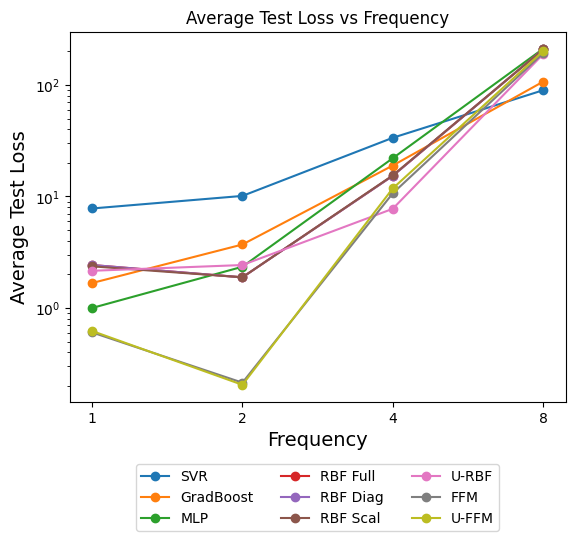

method,SVR,GradBoost,MLP,RBF Full,RBF Diag,RBF Scal,U-RBF,FFM,U-FFM
1 m,7.807181,1.674195,1.000000,2.428147,2.428147,2.362621,2.155427,0.603353,0.621546
1 s,16.287823,5.328319,3.791097,5.466036,5.466036,5.436228,4.979749,1.950618,1.945986
2 m,10.118909,3.709953,2.342601,1.882824,1.882907,1.884576,2.427483,0.213749,0.204460
2 s,13.922375,5.994938,5.185352,3.428531,3.428486,3.426015,5.284283,0.330409,0.335263
4 m,33.618417,18.954059,22.038323,15.322529,15.318947,15.448592,7.754188,10.673565,11.803106
4 s,44.006452,27.711875,27.655897,28.075760,28.075484,28.024172,13.876298,17.967339,17.524001
8 m,89.721693,107.059044,211.208892,208.678037,208.570149,208.349204,188.619706,192.657469,200.861925
8 s,88.968180,121.290580,158.207368,157.827033,157.692360,156.669576,137.344409,135.957669,146.741089
value m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
method_renaming = {
    "svr": "SVR",
    "gradboost": "GradBoost",
    "mlp": "MLP",
    "rbf_full": "RBF Full",
    "rbf_diag": "RBF Diag",
    "rbf_scal": "RBF Scal",
    "rbf_univ": "U-RBF",
    "ffn": "FFM",
    "uffn": "U-FFM",
}

### rename the method coords and only keep the methods that have a mapping

collapsed_repetition_dim_summary_data = collapsed_repetition_dim_summary_data.sel(dict(method=[key for key in method_renaming.keys() if key in collapsed_repetition_dim_summary_data.method.values]))
collapsed_repetition_dim_summary_data.coords['method'] = [method_renaming[method] for method in collapsed_repetition_dim_summary_data.method.values]



mean_summary_data = collapsed_repetition_dim_summary_data.sel(summary="mean")
std_summary_data = collapsed_repetition_dim_summary_data.sel(summary="std") 



mean_df = mean_summary_data.to_dataframe(name='value').reset_index()
mean_df = mean_df.pivot_table(index='frequencies', columns='method', values='value', aggfunc=lambda x: list(x)[0])

std_df = std_summary_data.to_dataframe(name='value').reset_index()
std_df = std_df.pivot_table(index='frequencies', columns='method', values='value', aggfunc=lambda x: list(x)[0])


## rename the row index 
mean_df.index = [str(dim) + " m"  for dim in mean_df.index]
std_df.index = [str(dim) + " s"  for dim in std_df.index]


### merge the mean and std dataframes into one and alternate the rows

final_df = pd.concat([mean_df, std_df], axis=0)
final_df = final_df.sort_index()


collapsed_repetition_dims_frequencies_summary_data = collapsed_repetition_dims_frequencies_summary_data.sel(dict(method=[key for key in method_renaming.keys() if key in collapsed_repetition_dim_summary_data.method.values]))
collapsed_repetition_dims_frequencies_summary_data.coords['method'] = [method_renaming[method] for method in collapsed_repetition_dims_frequencies_summary_data.method.values]


mean_datasets_summary_data = collapsed_repetition_dims_frequencies_summary_data.sel(summary="mean")
std_datasets_summary_data = collapsed_repetition_dims_frequencies_summary_data.sel(summary="std")

mean_datasets_summary_data = mean_datasets_summary_data.to_dataframe(name='value').reset_index()
mean_datasets_summary_data = mean_datasets_summary_data.pivot_table( columns='method', values='value', aggfunc=lambda x: list(x)[0])

std_datasets_summary_data = std_datasets_summary_data.to_dataframe(name='value').reset_index()
std_datasets_summary_data = std_datasets_summary_data.pivot_table( columns='method', values='value', aggfunc=lambda x: list(x)[0])

## rename the row index
mean_datasets_summary_data.index = [str(dim) + " m"  for dim in mean_datasets_summary_data.index]

std_datasets_summary_data.index = [str(dim) + " s"  for dim in std_datasets_summary_data.index]


final_datasets_summary_df = pd.concat([mean_datasets_summary_data, std_datasets_summary_data], axis=0)
final_datasets_summary_df = final_datasets_summary_df.sort_index()

final_df = pd.concat([final_df, final_datasets_summary_df], axis=0)


### sort the columns by the method name

final_df = final_df[method_renaming.values()]


df_means = final_df.loc[final_df.index.str.endswith(" m"), :]
## remove the m from the index

df_means.index = [dim.replace(" m", "") for dim in df_means.index]

## remove the row called value
df_means = df_means.drop(index="value")

### plot each method in a line plot with frequency on the x axis and the mean test loss on the y axis


print(df_means)

fig, ax = plt.subplots(1,1,)

ax.plot(df_means.index, df_means, marker='o', )

#ax.set_xticks(frequencies)
#ax.set_xticklabels(frequencies)
ax.set_xlabel("Frequency",fontsize=14)

ax.set_ylabel("Average Test Loss",fontsize=14)
ax.set_yscale('log')
ax.set_title("Average Test Loss vs Frequency")

ax.legend()
plt.legend(df_means.columns, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


plt.savefig("../../../assets/v2frequency_sweep.pdf", format="pdf", bbox_inches='tight')


plt.show()


final_df

In [62]:
## print the final df to a latex table

formatted_df = final_df.copy()

### format the values to 2 decimal places
formatted_df = formatted_df.map(lambda x: "{:.2f}".format(x))

## all rows that end with s in the index need values with brackets around them

formatted_df.loc[formatted_df.index.str.endswith(" s"), :] = formatted_df.loc[formatted_df.index.str.endswith(" s"), :].map(lambda x: "(± " + x + ")")

formatted_df.index = ["" if dim.endswith(" s") else "\multirow{2}{*}{" +dim.replace(' m','')+"}" for dim in formatted_df.index]

formatted_df.index = [dim.replace("value", "average") for dim in formatted_df.index]


latex = formatted_df.to_latex(float_format="%.2f", escape=False, column_format="l" + "c" * formatted_df.shape[1])

latex = latex.replace("_", "\_")

latex = latex.replace("method", "")


print(latex)

\begin{tabular}{lccccccccc}
\toprule
 & SVR & GradBoost & MLP & RBF Full & RBF Diag & RBF Scal & U-RBF & FFM & U-FFM \\
\midrule
\multirow{2}{*}{1} & 7.81 & 1.67 & 1.00 & 2.43 & 2.43 & 2.36 & 2.16 & 0.60 & 0.62 \\
 & (± 16.29) & (± 5.33) & (± 3.79) & (± 5.47) & (± 5.47) & (± 5.44) & (± 4.98) & (± 1.95) & (± 1.95) \\
\multirow{2}{*}{2} & 10.12 & 3.71 & 2.34 & 1.88 & 1.88 & 1.88 & 2.43 & 0.21 & 0.20 \\
 & (± 13.92) & (± 5.99) & (± 5.19) & (± 3.43) & (± 3.43) & (± 3.43) & (± 5.28) & (± 0.33) & (± 0.34) \\
\multirow{2}{*}{4} & 33.62 & 18.95 & 22.04 & 15.32 & 15.32 & 15.45 & 7.75 & 10.67 & 11.80 \\
 & (± 44.01) & (± 27.71) & (± 27.66) & (± 28.08) & (± 28.08) & (± 28.02) & (± 13.88) & (± 17.97) & (± 17.52) \\
\multirow{2}{*}{8} & 89.72 & 107.06 & 211.21 & 208.68 & 208.57 & 208.35 & 188.62 & 192.66 & 200.86 \\
 & (± 88.97) & (± 121.29) & (± 158.21) & (± 157.83) & (± 157.69) & (± 156.67) & (± 137.34) & (± 135.96) & (± 146.74) \\
\multirow{2}{*}{average} & nan & nan & nan & nan & nan & nan & na

In [63]:
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# print(collapsed_repetition_dims_frequencies_summary_data.coords)


# mean_repetition_datasets_df = collapsed_repetition_dims_frequencies_summary_data.sel(summary="mean").to_dataframe(name='value').reset_index()
# mean_repetition_datasets_df = mean_repetition_datasets_df.pivot_table(index='method',  values='value', aggfunc=lambda x: list(x)[0])

# mean_repetition_datasets_df = mean_repetition_datasets_df.rename(index=method_renaming)
# ## sort the index by the order in the method names list
# mean_repetition_datasets_df = mean_repetition_datasets_df.reindex(method_renaming.values())

# ## normalize the data by the mlp value
# mean_repetition_datasets_df = mean_repetition_datasets_df / mean_repetition_datasets_df.loc["MLP"]



# print(mean_repetition_datasets_df)

# ###               value
# # method             
# # SVR        4.031763
# # GradBoost  0.528505
# # MLP        1.000000
# # RBF Full   0.691842
# # RBF Diag   0.691842
# # RBF Scal   3.681355
# # U-RBF      0.566239
# # FFM        3.796245
# # U-FFM      0.662704


# ## plot this in a colored bar chart
# plt.bar(mean_repetition_datasets_df.index, mean_repetition_datasets_df.value, color=colors)

# plt.ylabel("Normalized Average Test Loss",fontsize=14)
# plt.yscale("log")
# plt.ylim(bottom=0)
# plt.xticks(rotation=90)

# plt.savefig("../../../assets/full_dataset_summary.pdf", format="pdf", bbox_inches='tight')


# plt.show()

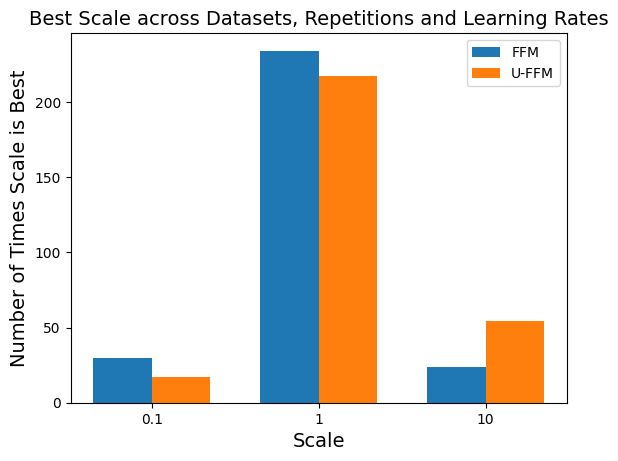

In [64]:
### only keep the ffn and uffn method

ffn_experiments_data = experiments_data.sel(dict(method=["ffn"]))
uffn_experiments_data = experiments_data.sel(dict(method=["uffn"]))

### print a histogram of how often each scale is the best across datasets, repetitions and learning rates
ffn_min_loss_index = ffn_experiments_data.argmin(dim='scales')
uffn_min_loss_index = uffn_experiments_data.argmin(dim='scales')

## count the number of times each scale is the best
ffn_min_loss_index  = ffn_min_loss_index.values.flatten()
unique, counts = np.unique(ffn_min_loss_index, return_counts=True)

uffn_min_loss_index  = uffn_min_loss_index.values.flatten()
unique, counts_uffn = np.unique(uffn_min_loss_index, return_counts=True)


### plot the histogram of the counts for ffn and uffn in separate bars with different colors


fig, ax = plt.subplots()
bar_width = 0.35
bar_widths = np.arange(len(unique))

ax.bar(bar_widths, counts, bar_width, label='FFM', color=colors[0])
ax.bar(bar_widths + bar_width, counts_uffn, bar_width, label='U-FFM', color=colors[1])

ax.set_xticks(bar_widths + bar_width / 2)
ax.set_xticklabels(["0.1", "1", "10"])
ax.set_xlabel("Scale", fontsize=14)

ax.set_ylabel("Number of Times Scale is Best", fontsize=14)
ax.legend()

plt.title("Best Scale across Datasets, Repetitions and Learning Rates", fontsize=14)

plt.savefig("../../../assets/v2noise_ffm_scale_histogram.pdf", format="pdf", bbox_inches='tight')
plt.show()
